In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
list(train_data) # get the name of headers

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

# Let's examine some of the features
### 1. MSSubClass (categorical feature)

In [8]:
np.unique(train_data['MSSubClass'])

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190], dtype=int64)

plot the price average for each class with sns.pointplot

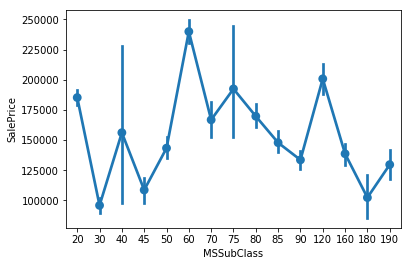

In [9]:
sns.pointplot('MSSubClass','SalePrice', data= train_data)

### 2. MSZoning (categorical feature)

In [10]:
np.unique(train_data['MSZoning'])

array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)

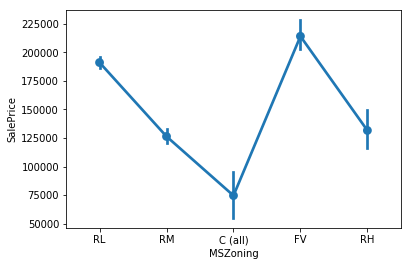

In [11]:
sns.pointplot('MSZoning','SalePrice', data= train_data)

### Let's combine these two categorical features and the dependence of prices.

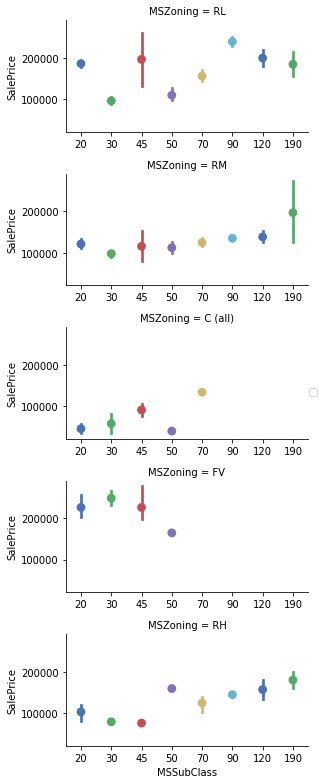

In [12]:
grid = sns.FacetGrid(train_data, row='MSZoning', size=2.2, aspect=2)
grid.map(sns.pointplot, 'MSSubClass', 'SalePrice', palette='deep')
grid.add_legend()

## 3. LotArea (numeric feature)
we skip the "LotFrontage" feature because there are missing values in it.

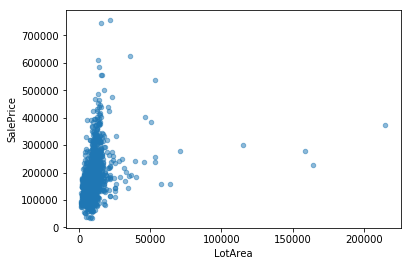

In [13]:
#sns.regplot(x='LotArea', y='SalePrice',data=train_data)
train_data.plot(kind='scatter', x= 'LotArea', y = 'SalePrice', alpha=0.5)

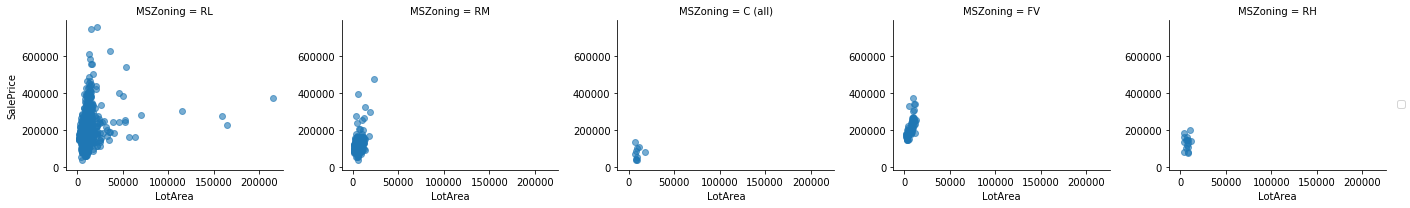

In [14]:
grid = sns.FacetGrid(train_data, col='MSZoning', size=3, aspect=1.3)
grid.map(plt.scatter, 'LotArea', 'SalePrice', alpha=0.6)
grid.add_legend()

# It is impossible to do this analysis for all features. 
### Let's find out the correlation between features and correlation between features and label.

In [15]:
corr_matrix = train_data.corr()

In [16]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [17]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

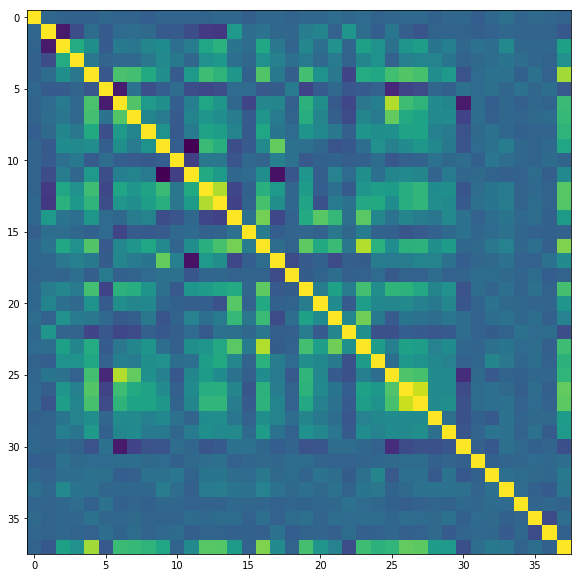

In [18]:
plt.figure(figsize=[10,10])
plt.imshow(corr_matrix)
plt.show()

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [20]:
test_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


### Next let us write a few pipelines to preprocess data so that we can use it for training later.
Let's get the numerical feature and categorical feature first. Note that we don't need the ID feature and we need to separate the label i.e. "SalePrice" from the rest of the features.

In [21]:
train_num = train_data.iloc[:,1:-1].select_dtypes(include=[np.number])
train_cat = train_data.iloc[:,1:-1].select_dtypes(include=['object'])
y = train_data['SalePrice'].values

In [22]:
num_attribs = list(train_num)
cat_attribs = list(train_cat)

## Define a class for select numeric feature data and categorical feature data

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### For numeric data, use Imputer to deal with missing values; Use StandardScaler to scale the numerical values 

In [24]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler()),   
])

### For categorical data, to deal with missing values, we usually have following ways:
    1.Ignore observations of missing values if we are dealing with large data sets and less number of records has missing values
    2.Ignore variable, if it is not significant
    3.Replace by most frequent value or Replace using an algorithm like KNN using the neighbours.
    4.Develop model to predict missing values (multiclass classification)
    5.Treat missing data as just another category


### Let us write our own class to deal with missing values in the categorical feature.
### We use two ways of fill NAN. First is "most frequent". Second is called 'probability', i.e. we fill in the "nan" position depending on the probability distribution of different categories.

In [25]:
#import numpy.ma as ma
from scipy import stats
from sklearn.utils import check_array


def _get_mask(X, value_to_mask):
    """Compute the boolean mask X == missing_values."""
    if value_to_mask == "NaN" or np.isnan(value_to_mask):
        return pd.isnull(X)
    else:
        return X == value_to_mask

class CatImputer(BaseEstimator, TransformerMixin):
    """Imputation transformer for completing missing values.
    Read more in the :ref:`User Guide <imputation>`.
    Parameters
    ----------
    missing_values : integer or "NaN", optional (default="NaN")
        The placeholder for the missing values. All occurrences of
        `missing_values` will be imputed. For missing values encoded as np.nan,
        use the string value "NaN".
    strategy : string, optional (default="most_frequent")
        The imputation strategy.
        - If "", then replace missing values using the mean along
          the axis.
        - If "", then replace missing values using the median along
          the axis.
        - If "most_frequent", then replace missing using the most frequent
          value along the axis.
    axis : integer, optional (default=0)
        The axis along which to impute.
        - If `axis=0`, then impute along columns.
        - If `axis=1`, then impute along rows.
    
    """
    def __init__(self, missing_values="NaN", strategy="most_frequent",
                 axis=0, copy=True):
        self.missing_values = missing_values
        self.strategy = strategy
        self.axis = axis
        self.copy = copy
    
    def fit(self, X, y=None):
        '''
        X : numpy array. If X is a pandas datagframe, transform it to numpy array first.
        '''
        
        
        # Check parameters
        allowed_strategies = ["probability", "most_frequent"]
        if self.strategy not in allowed_strategies:
            raise ValueError("Can only use these strategies: {0} "
                             " got strategy={1}".format(allowed_strategies,
                                                        self.strategy))

        if self.axis not in [0]:
            raise ValueError("Can only impute missing values on axis 0 and 1, "
                             " got axis={0}".format(self.axis))

        #X = check_array(X)
        self.statistics_=self._dense_fit(X,
                                         self.strategy,
                                         self.missing_values,
                                         self.axis)
        return self
    
    def _dense_fit(self, X, strategy, missing_values, axis):
        mask = _get_mask(X, missing_values)
        
        if strategy == 'most_frequent':
            
            # To be able access the elements by columns
            if axis == 0:
                X = X.transpose()
                mask = mask.transpose()

            most_frequent = np.empty(X.shape[0],  dtype=object)

            for i, (row, row_mask) in enumerate(zip(X[:], mask[:])):
                row_mask = np.logical_not(row_mask).astype(np.bool)
                row = row[row_mask]
                cat = np.unique(row)
                counts = []
                for element in cat:
                    counts.append((row==element).sum())
                counts= np.array(counts)
                most_frequent[i] = cat[counts==counts.max()][0]
            return most_frequent

        
        if strategy == 'probability':
            
            if axis == 0:
                X = X.transpose()
                mask = mask.transpose()
            unique = []
            distri = []

            for i, (row, row_mask) in enumerate(zip(X[:], mask[:])):
                row_mask = np.logical_not(row_mask).astype(np.bool)
                row = row[row_mask]
                cat = np.unique(row)
                counts = []
                for element in cat:
                    counts.append((row==element).sum())
                unique.append(cat)
                distri.append(counts/sum(counts))
                

            return unique, distri
    
    def transform(self, X):
        X = np.copy(X)
        statistics = self.statistics_
        if self.strategy == 'most_frequent':
            
            mask = _get_mask(X, self.missing_values)
            n_missing = np.sum(mask, axis=self.axis) # get the number of missing values
            values = np.repeat(statistics, n_missing) # np.repeat returns an array by repeat statistics[i] for n_missing[i] times
            if self.axis == 0:
                coordinates = np.where(mask.transpose())[::-1] #np.where returns the index, i.e. location of ones
            else:
                coordinates = mask

            X[coordinates] = values
            
        if self.strategy == 'probability':
            unique_letter, norm_counts = statistics
            mask = _get_mask(X, self.missing_values)
            n_missing = np.sum(mask, axis=self.axis)
            total_missing = np.sum(mask)
            rand_v = np.random.random(total_missing)
            
            #values = np.empty(total_missing, dtype=str)
            values = [None]*total_missing # bug will occur if we use np.empty()
            ind = 0
            for k, (i,j) in enumerate(zip(unique_letter,norm_counts)):
                n_miss = n_missing[k]
                j_cumsum = np.cumsum(np.array(j))
                
                value_temp = np.repeat(max(i, key=len),n_miss)# This step is to prevent string cropping when we assign a longer string.
                value_temp[:] = i[-1]
                rand_v_temp = rand_v[ind:ind+n_miss]
                for j_ind in np.arange(len(j)):
                    if j_ind == 0:
                        value_temp[(rand_v_temp > 0) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
                    else:
                        value_temp[(rand_v_temp > j_cumsum[j_ind-1]) & (rand_v_temp < j_cumsum[j_ind])] = i[j_ind]
                values[ind:ind+n_miss] = value_temp
                ind = ind+n_miss
            coordinates = np.where(mask.transpose())[::-1]
            X[coordinates] = values
            
        return X


In [26]:
cat_imputer = CatImputer(missing_values="NaN", strategy="most_frequent", axis=0, copy=True)
test_df = train_cat
test_ft_tran = cat_imputer.fit_transform(test_df.values)

In [27]:
test_cat_tran= cat_imputer.transform(test_data[cat_attribs])

In [28]:
np.sum(pd.isnull(test_cat_tran))

0

### After testing, our class seems to work OK.
## We notice that there is some features that have very few entries. We decide to write another class to remove them.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureRemover(BaseEstimator, TransformerMixin):
    '''
    This class is used to remove some features that have a lot of NaN values which exceeds certain threshold value.
    
    Parameters:
    -----------------------
    threshold: float, between 0 and 1. Remove feature if number of nan's exceeds this value.
    
    '''
    def __init__(self, threshold=0.3):
        self.threshold = threshold
    def fit(self, X, y=None):
        '''
        Parameter:
        X : Pandas DataFrame
        '''
        isnull = pd.isnull(X)
        nan_numbers=isnull.values.sum(axis=0)
        self.nan_ratio = nan_numbers/isnull.shape[0]
        features = list(isnull)
        temp = np.array(features)
        self.feature_to_remove = temp[self.nan_ratio > self.threshold]
        
        return self
    def transform(self, X):
        feature_to_remove = self.feature_to_remove
        return X.drop(feature_to_remove, axis=1)

In [30]:
feature_remover = FeatureRemover(threshold=0.3)
trys = feature_remover.fit_transform(train_cat)

### Let's construct out pipeline for dealing with categorical features.

In [31]:
## We are going to use this Categorical Encoder to cope with catergorical features.
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot (aka one-of-K or dummy)
    encoding scheme (``encoding='onehot'``, the default) or converted
    to ordinal integers (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories must be sorted and should not mix
          strings and numeric values.
        The used categories can be found in the ``categories_`` attribute.
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros. In the inverse transform, an unknown category
        will be denoted as None.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting
        (in order corresponding with output of ``transform``).
    Examples
    --------
    Given a dataset with two features, we let the encoder find the unique
    values per feature and transform the data to a binary one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> X = [['Male', 1], ['Female', 3], ['Female', 2]]
    >>> enc.fit(X)
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.categories_
    [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
    >>> enc.transform([['Female', 1], ['Male', 4]]).toarray()
    array([[ 1.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.]])
    >>> enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])
    array([['Male', 1],
           [None, 2]], dtype=object)
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        if self.categories != 'auto':
            for cats in self.categories:
                if not np.all(np.sort(cats) == np.array(cats)):
                    raise ValueError("Unsorted categories are not yet "
                                     "supported")

        X_temp = check_array(X, dtype=None)
        if not hasattr(X, 'dtype') and np.issubdtype(X_temp.dtype, np.str_):
            X = check_array(X, dtype=np.object)
        else:
            X = X_temp

        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                if self.handle_unknown == 'error':
                    valid_mask = np.in1d(Xi, self.categories[i])
                    if not np.all(valid_mask):
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(self.categories[i])

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using specified encoding scheme.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X_temp = check_array(X, dtype=None)
        if not hasattr(X, 'dtype') and np.issubdtype(X_temp.dtype, np.str_):
            X = check_array(X, dtype=np.object)
        else:
            X = X_temp

        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            Xi = X[:, i]
            valid_mask = np.in1d(Xi, self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    Xi = Xi.copy()
                    Xi[~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(Xi)

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        feature_indices = np.cumsum(n_values)

        indices = (X_int + feature_indices[:-1]).ravel()[mask]
        indptr = X_mask.sum(axis=1).cumsum()
        indptr = np.insert(indptr, 0, 0)
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csr_matrix((data, indices, indptr),
                                shape=(n_samples, feature_indices[-1]),
                                dtype=self.dtype)
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

    def inverse_transform(self, X):
        """Convert back the data to the original representation.
        In case unknown categories are encountered (all zero's in the
        one-hot encoding), ``None`` is used to represent this category.
        Parameters
        ----------
        X : array-like or sparse matrix, shape [n_samples, n_encoded_features]
            The transformed data.
        Returns
        -------
        X_tr : array-like, shape [n_samples, n_features]
            Inverse transformed array.
        """
        check_is_fitted(self, 'categories_')
        X = check_array(X, accept_sparse='csr')

        n_samples, _ = X.shape
        n_features = len(self.categories_)
        n_transformed_features = sum([len(cats) for cats in self.categories_])

        # validate shape of passed X
        msg = ("Shape of the passed X data is not correct. Expected {0} "
               "columns, got {1}.")
        if self.encoding == 'ordinal' and X.shape[1] != n_features:
            raise ValueError(msg.format(n_features, X.shape[1]))
        elif (self.encoding.startswith('onehot')
                and X.shape[1] != n_transformed_features):
            raise ValueError(msg.format(n_transformed_features, X.shape[1]))

        # create resulting array of appropriate dtype
        dt = np.find_common_type([cat.dtype for cat in self.categories_], [])
        X_tr = np.empty((n_samples, n_features), dtype=dt)

        if self.encoding == 'ordinal':
            for i in range(n_features):
                labels = X[:, i].astype('int64')
                X_tr[:, i] = self.categories_[i][labels]

        else:  # encoding == 'onehot' / 'onehot-dense'
            j = 0
            found_unknown = {}

            for i in range(n_features):
                n_categories = len(self.categories_[i])
                sub = X[:, j:j + n_categories]

                # for sparse X argmax returns 2D matrix, ensure 1D array
                labels = np.asarray(_argmax(sub, axis=1)).flatten()
                X_tr[:, i] = self.categories_[i][labels]

                if self.handle_unknown == 'ignore':
                    # ignored unknown categories: we have a row of all zero's
                    unknown = np.asarray(sub.sum(axis=1) == 0).flatten()
                    if unknown.any():
                        found_unknown[i] = unknown

                j += n_categories

            # if ignored are found: potentially need to upcast result to
            # insert None values
            if found_unknown:
                if X_tr.dtype != object:
                    X_tr = X_tr.astype(object)

                for idx, mask in found_unknown.items():
                    X_tr[mask, idx] = None

        return X_tr

In [32]:
cate_encoder = CategoricalEncoder()
test_cat_1hot=cate_encoder.fit_transform(test_cat_tran)

In [33]:
test_cat_1hot.todense().shape

(1459, 234)

In [34]:
cat_pipeline = Pipeline([
    ('feature_remover', FeatureRemover(threshold = 0.3) ),
    ('selector', DataFrameSelector([x for x in cat_attribs if x not in feature_remover.feature_to_remove])),
    ('cat_imputer', CatImputer(missing_values="NaN", strategy="probability", axis=0, copy=True)),
    ('cat_encoder', CategoricalEncoder())
])

In [35]:
cat_prepared = cat_pipeline.fit_transform(train_data)

In [36]:
cat_prepared

<1460x234 sparse matrix of type '<class 'numpy.float64'>'
	with 55480 stored elements in Compressed Sparse Row format>

In [37]:
cat_test_prepared = cat_pipeline.transform(test_data)

In [38]:
cat_test_prepared

<1459x234 sparse matrix of type '<class 'numpy.float64'>'
	with 55442 stored elements in Compressed Sparse Row format>

## Let's combine the two pipelines together with FeatureUnion.
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler()),   
])

cat_pipeline = Pipeline([
    ('feature_remover', FeatureRemover(threshold = 0.3) ),
    ('selector', DataFrameSelector([x for x in cat_attribs if x not in feature_remover.feature_to_remove])),
    ('cat_imputer', CatImputer(missing_values="NaN", strategy="probability", axis=0, copy=True)),
    ('cat_encoder', CategoricalEncoder())
])


Note that we could also apply feature_remover to numeric data. Since our numeric features don't have many NaN values, we skip this step.

In [39]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [40]:
train_prepared = full_pipeline.fit_transform(train_data)

In [41]:
train_prepared = train_prepared.toarray()

In [42]:
test_prepared = full_pipeline.transform(test_data)

In [43]:
test_prepared = test_prepared.toarray()

In [44]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

### Try some models to fit the data

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
some_data = train_data.iloc[:5]
some_labels = some_data.iloc[:,-1]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [ 206552.  208376.  206608.  164808.  290960.]
Labels: [208500, 181500, 223500, 140000, 250000]


In [47]:
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(train_prepared)
lin_rmse = np.sqrt(mean_squared_error(y, y_predict))
print(lin_rmse)

20951.2482388


In [48]:
np.log(lin_rmse)

9.9499535053787351

In [49]:
test_predict = lin_reg.predict(test_prepared)

In [50]:
test_predict

array([ 112140.,  158768.,  188964., ...,  179656.,  106948.,  220600.])

In [51]:
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": test_predict
    })

In [52]:
submission.to_csv('linear_reg_pred.csv',index=False)

### After submission, kaggle gives a score 0.85, ranked 4195. This is very bad!


### Let's try some other models and evaluate their performance by cross_validation

In [53]:
def display_scores(scores):
    print("Score:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [54]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, train_prepared, y, scoring = 'neg_mean_squared_error', cv=10)
display_scores(-lin_scores)

Score: [  1.26971827e+27   5.57467071e+27   2.45038568e+29   9.48207790e+26
   3.83182094e+26   1.89292907e+09   9.56424781e+27   2.17823004e+29
   5.22422411e+29   2.08677915e+28]
Mean: 1.02389180109e+29
Standard deviation: 1.66174958758e+29


In [55]:
from sklearn.model_selection import train_test_split
train_set, dev_set, y_train, y_dev = train_test_split(train_prepared, y, test_size = 0.1, random_state =42)

In [56]:
lin_reg.fit(train_set, y_train)
train_score = np.sqrt(mean_squared_error(y_train, lin_reg.predict(train_set)))
dev_score = np.sqrt(mean_squared_error(y_dev, lin_reg.predict(dev_set)))
print(train_score)
print(dev_score)

20200.6112484
1.61571819648e+14


### linear regressor is indeed very bad! It has done serious overfitting.

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, y)
y_forest_predict = forest_reg.predict(train_prepared)
forest_rmse = np.sqrt(mean_squared_error(y, y_forest_predict))
print(forest_rmse)

12630.6092904


In [58]:
forest_scores = cross_val_score(forest_reg, train_prepared, y, scoring = 'neg_mean_squared_error', cv=10)
display_scores(np.sqrt(-forest_scores))

Score: [ 26465.07898199  27611.94073102  22433.83209506  41621.14391257
  30955.3343445   27537.86016741  23970.70279121  25521.17409088
  41460.93239962  28222.48504884]
Mean: 29580.0484563
Standard deviation: 6376.77361037


In [59]:
test_forest_predict = forest_reg.predict(test_prepared)
test_forest_predict

array([ 122600.,  149430.,  189650., ...,  152550.,  115310.,  231000.])

In [60]:
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": test_forest_predict
    })

In [61]:
submission.to_csv('forest_reg_pred.csv',index=False)

### Use a grid search to find the best hyperparameters

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=50, high=200),
        'max_features': randint(low=50, high=241),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=30, cv=10, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_prepared, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F78BD82C88>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F78BD82D68>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [63]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

28697.487649 {'max_features': 152, 'n_estimators': 142}
28673.3713147 {'max_features': 64, 'n_estimators': 156}
28561.5143886 {'max_features': 121, 'n_estimators': 70}
28689.1437618 {'max_features': 152, 'n_estimators': 171}
28923.8974643 {'max_features': 124, 'n_estimators': 137}
29173.3425632 {'max_features': 166, 'n_estimators': 149}
28920.2990715 {'max_features': 153, 'n_estimators': 180}
29124.3551845 {'max_features': 199, 'n_estimators': 102}
28830.7661942 {'max_features': 51, 'n_estimators': 137}
29211.3052388 {'max_features': 207, 'n_estimators': 87}
28831.7809079 {'max_features': 179, 'n_estimators': 70}
29239.8191858 {'max_features': 210, 'n_estimators': 107}
28679.4786851 {'max_features': 71, 'n_estimators': 138}
29088.7983495 {'max_features': 98, 'n_estimators': 108}
29166.8825408 {'max_features': 219, 'n_estimators': 64}
29193.0196976 {'max_features': 239, 'n_estimators': 100}
28852.6391485 {'max_features': 157, 'n_estimators': 104}
28750.2619685 {'max_features': 113, 'n_e

In [64]:
rnd_search.best_params_

{'max_features': 121, 'n_estimators': 70}

In [65]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=121, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
best_forest_reg = rnd_search.best_estimator_
forest_scores = cross_val_score(best_forest_reg, train_prepared, y, scoring = 'neg_mean_squared_error', cv=10)
display_scores(np.sqrt(-forest_scores))

Score: [ 22063.45677353  25386.45230262  23474.53141824  40558.25012596
  33174.75874215  24444.06863528  24575.75386368  22681.54099693
  37448.09481303  24727.53088464]
Mean: 27853.4438556
Standard deviation: 6320.26657277


In [67]:
best_forest_reg.fit(train_prepared, y)
y_forest_predict = best_forest_reg.predict(train_prepared)
forest_rmse = np.sqrt(mean_squared_error(y, y_forest_predict))
print(forest_rmse)

10835.6303423


In [68]:
test_forest_predict = best_forest_reg.predict(test_prepared)
test_forest_predict

array([ 124178.08571429,  156296.42857143,  180196.28571429, ...,
        160146.42857143,  112932.25714286,  232787.34285714])

In [69]:
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": test_forest_predict
    })
submission.to_csv('best_forest_reg_pred.csv',index=False)

In [70]:
who

BaseEstimator	 CatImputer	 CategoricalEncoder	 DataFrameSelector	 FeatureRemover	 FeatureUnion	 Imputer	 LabelEncoder	 LinearRegression	 
Pipeline	 RandomForestRegressor	 RandomizedSearchCV	 StandardScaler	 TransformerMixin	 best_forest_reg	 cat_attribs	 cat_imputer	 cat_pipeline	 
cat_prepared	 cat_test_prepared	 cate_encoder	 check_array	 corr_matrix	 cross_val_score	 cvres	 dev_score	 dev_set	 
display_scores	 feature_remover	 forest_reg	 forest_rmse	 forest_scores	 full_pipeline	 grid	 lin_reg	 lin_rmse	 
lin_scores	 mean_score	 mean_squared_error	 np	 num_attribs	 num_pipeline	 param_distribs	 params	 pd	 
plt	 randint	 rnd_search	 sns	 some_data	 some_data_prepared	 some_labels	 sparse	 stats	 
submission	 test_cat_1hot	 test_cat_tran	 test_data	 test_df	 test_forest_predict	 test_ft_tran	 test_predict	 test_prepared	 
train_cat	 train_data	 train_num	 train_prepared	 train_score	 train_set	 train_test_split	 trys	 y	 
y_dev	 y_forest_predict	 y_predict	 y_train	 


## Let's try gradient boosting regressor 

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
forest_scores = cross_val_score(gbr, train_prepared, y, scoring = 'neg_mean_squared_error', cv=10)
display_scores(np.sqrt(-forest_scores))

Score: [ 21073.18605734  23781.24037239  19834.80984791  37404.50979266
  29011.73342088  25894.3808677   25545.44100436  21822.32179416
  27974.53207897  25259.2488394 ]
Mean: 25760.1404076
Standard deviation: 4773.70169551


In [73]:
gbr.fit(train_prepared, y)
y_gbr_predict = gbr.predict(train_prepared)
forest_rmse = np.sqrt(mean_squared_error(y, y_gbr_predict))
print(forest_rmse)

14583.8810374


In [74]:
test_gbr_predict = gbr.predict(test_prepared)
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": test_gbr_predict
    })
submission.to_csv('gbr_pred.csv',index=False)

### This gradient boosting regressor results in better score. Let's do hyperparameter tuning.

In [75]:
param_distribs = {
        'n_estimators': randint(low=50, high=200),
        'max_depth': randint(low=2, high=8),
    }

rnd_search = RandomizedSearchCV(gbr, param_distributions=param_distribs,
                                n_iter=30, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rnd_search.fit(train_prepared, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F789F5A2E8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F789F5AA90>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [76]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

25838.5616466 {'max_depth': 3, 'n_estimators': 147}
26328.447675 {'max_depth': 3, 'n_estimators': 116}
29184.6379162 {'max_depth': 7, 'n_estimators': 195}
26051.1992997 {'max_depth': 2, 'n_estimators': 183}
26598.1124948 {'max_depth': 3, 'n_estimators': 87}
27031.3801921 {'max_depth': 2, 'n_estimators': 117}
27502.4307647 {'max_depth': 6, 'n_estimators': 159}
28414.0475381 {'max_depth': 6, 'n_estimators': 69}
26449.6075007 {'max_depth': 2, 'n_estimators': 168}
28130.8363387 {'max_depth': 6, 'n_estimators': 73}
26487.837021 {'max_depth': 3, 'n_estimators': 98}
28482.3970287 {'max_depth': 7, 'n_estimators': 86}
28101.7128697 {'max_depth': 5, 'n_estimators': 91}
26401.1748797 {'max_depth': 4, 'n_estimators': 134}
28108.1629471 {'max_depth': 5, 'n_estimators': 56}
29099.8775373 {'max_depth': 7, 'n_estimators': 149}
27365.9804436 {'max_depth': 2, 'n_estimators': 116}
25827.9992541 {'max_depth': 3, 'n_estimators': 119}
27179.7030524 {'max_depth': 4, 'n_estimators': 52}
28232.1192675 {'max_de

In [77]:
rnd_search.best_params_

{'max_depth': 3, 'n_estimators': 132}

In [79]:
best_gbr= rnd_search.best_estimator_
gbr_scores = cross_val_score(best_gbr, train_prepared, y, scoring = 'neg_mean_squared_error', cv=10)
display_scores(np.sqrt(-gbr_scores))

Score: [ 20708.14585868  23549.6662972   19227.63568685  38419.79416554
  28474.75629966  25538.99690106  24249.76907085  21496.0182825
  28409.5746668   24527.4339585 ]
Mean: 25460.1791188
Standard deviation: 5185.27336032


In [80]:
best_gbr.fit(train_prepared, y)
y_gbr_predict = best_gbr.predict(train_prepared)
print(np.sqrt(mean_squared_error(y, y_gbr_predict)))

13274.6981872


In [81]:
test_gbr_predict = best_gbr.predict(test_prepared)
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": test_gbr_predict
    })
submission.to_csv('best_gbr_pred.csv',index=False)

### This improves slightly over the default hyperparameters used by gradient boosting. So we should do more feature engineering.

From the results of random forest regressor, we can find out that not all features are used to do regression. Let's first try to remove some numeric features that have low correlation with price.